## 准备数据

In [2]:
# 在Jupyter中,使用matplotlib显示图像需要设置为 inline 模式,否则不会显示图像
%matplotlib inline

import matplotlib.pyplot as plt  # 载入matplotlib
import numpy as np  # 载入numpy
import tensorflow as tf  # 载入Tensorflow

np.random.seed(5)

print("TensorFlow版本是：", tf.__version__)

TensorFlow版本是： 2.12.0


In [3]:
# 直接采用np生成等差数列的方法,生成100个点,每个点的取值在-1~1之间
x_data = np.linspace(-1, 1, 100)

# y = 2x +1 + 噪声, 其中,噪声的维度与x_data一致
y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4

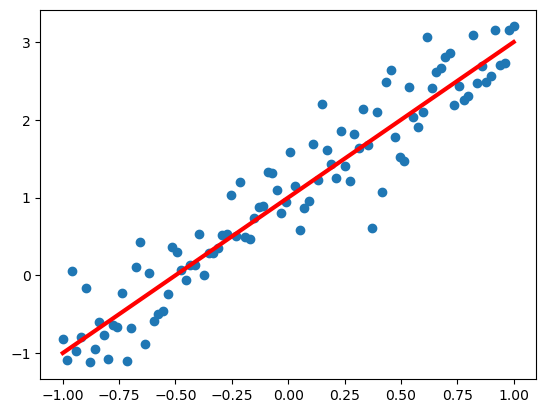

In [4]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 

# 画出我们想要学习到的线性函数 y = 2x +1

plt.plot (x_data, 2 * x_data + 1.0, color = 'red',linewidth=3) 

## 构建模型

In [5]:
def model(x, w, b):
    return tf.multiply(x, w) + b


In [6]:
# 构建线性函数的斜率,变量w
w = tf.Variable(np.random.randn(), tf.float32)

# 构建线性函数的截距,变量b
b = tf.Variable(0.0, tf.float32)

In [7]:
# 定义均方差损失函数


def loss(x, y, w, b):
    err = model(x, w, b) - y  # 计算模型预测值和标签值的差异
    squared_err = tf.square(err)  # 求平方,得出方差
    return tf.reduce_mean(squared_err)  # 求均值,得出均方差


In [8]:
# 迭代次数（训练轮数）
train_epochs = 10

# 学习率
learning_rate = 0.05

## 定义计算梯度函数

In [9]:
# 计算样本数据[x,y]在参数[w,b]点上的梯度
def grad(x, y, w, b):
    with tf.GradientTape() as tape:
        loss_ = loss(x, y, w, b)
    return tape.gradient(loss_, [w, b])  # 返回梯度向量


## 训练模型

Training Epoch: 01 Step: 010 loss=0.010733
Training Epoch: 01 Step: 020 loss=0.195219
Training Epoch: 01 Step: 030 loss=0.030849
Training Epoch: 01 Step: 040 loss=0.657557
Training Epoch: 01 Step: 050 loss=0.011179
Training Epoch: 01 Step: 060 loss=0.032842
Training Epoch: 01 Step: 070 loss=0.385728
Training Epoch: 01 Step: 080 loss=0.035590
Training Epoch: 01 Step: 090 loss=0.023745
Training Epoch: 01 Step: 100 loss=0.114204
Training Epoch: 02 Step: 110 loss=0.201401
Training Epoch: 02 Step: 120 loss=0.065766
Training Epoch: 02 Step: 130 loss=0.000264
Training Epoch: 02 Step: 140 loss=0.345995
Training Epoch: 02 Step: 150 loss=0.020776
Training Epoch: 02 Step: 160 loss=0.006046
Training Epoch: 02 Step: 170 loss=0.143642
Training Epoch: 02 Step: 180 loss=0.000182
Training Epoch: 02 Step: 190 loss=0.094071
Training Epoch: 02 Step: 200 loss=0.052816
Training Epoch: 03 Step: 210 loss=0.044995
Training Epoch: 03 Step: 220 loss=0.082510
Training Epoch: 03 Step: 230 loss=0.000453
Training Ep

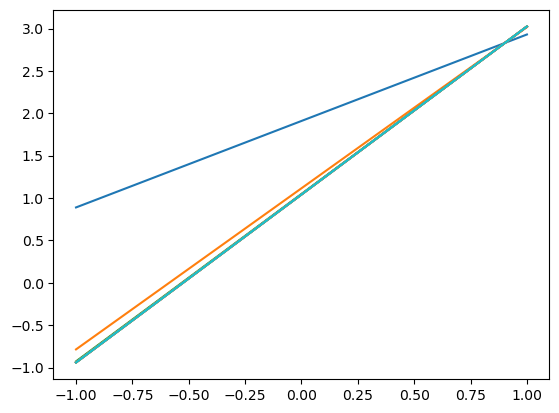

In [10]:
step = 0  # 记录训练步数
loss_list = []  # 保存loss值
display_step = 10  # 控制数据显示频率,非超参数


# 开始训练
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        loss_ = loss(xs, ys, w, b)  # 计算损失
        loss_list.append(loss_)  # 保存本次损失计算结果

        delta_w, delta_b = grad(xs, ys, w, b)  # 计算该当前[w, b]点的梯度
        change_w = delta_w * learning_rate  # 计算变量w需要调整的量
        change_b = delta_b * learning_rate  # 计算变量b需要调整的量

        w.assign_sub(change_w)  # 变量w值变更为减去chage_w后的值
        b.assign_sub(change_b)  # 变量b值变更为减去chage_b后的值

        step = step + 1  # 训练步数+1

        if step % display_step == 0:  # 显示训练过程信息
            print(
                "Training Epoch:",
                "%02d" % (epoch + 1),
                "Step: %03d" % (step),
                "loss=%.6f" % (loss_),
            )
    plt.plot(x_data, w.numpy() * x_data + b.numpy())  # 完成一轮训练后,画出回归的线条


In [11]:
print("w:", w.numpy())
print("b:", b.numpy())


w: 1.9822965
b: 1.0420128


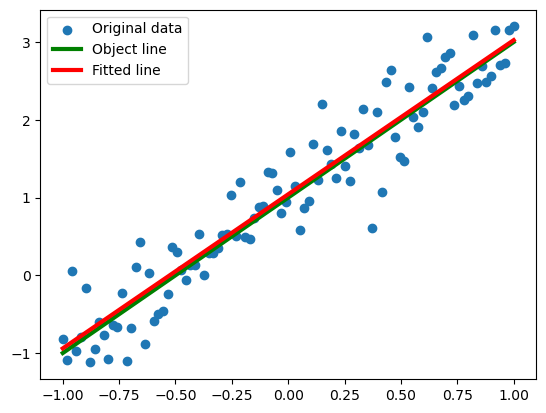

In [12]:
plt.scatter(x_data, y_data, label="Original data")
plt.plot(x_data, x_data * 2.0 + 1.0, label="Object line", color="g", linewidth=3)
plt.plot(
    x_data, x_data * w.numpy() + b.numpy(), label="Fitted line", color="r", linewidth=3
)
plt.legend(loc=2)  # 通过参数loc指定图例的位置


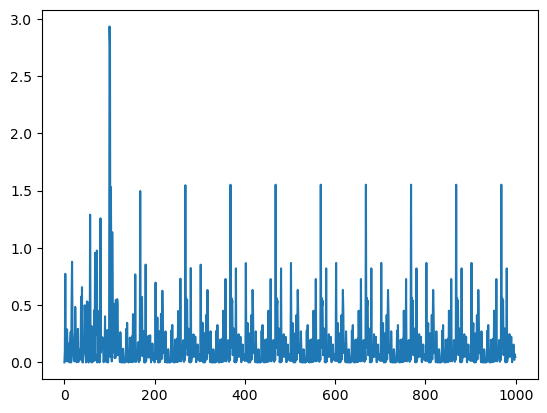

In [13]:
# 损失可视化
plt.plot(loss_list)


## 进行预测

In [14]:
x_test = 3.21  # 测试样本

predict = model(x_test, w.numpy(), b.numpy())
print("预测值:%f" % predict)

target = 2 * x_test + 1.0
print("目标值:%f" % target)


预测值:7.405184
目标值:7.420000


In [15]:
# 迭代次数（训练轮数）
train_epochs = 100

# 学习率
learning_rate = 0.05


Training Epoch: 01 loss=0.138874
Training Epoch: 02 loss=0.138857
Training Epoch: 03 loss=0.138841
Training Epoch: 04 loss=0.138827
Training Epoch: 05 loss=0.138814
Training Epoch: 06 loss=0.138803
Training Epoch: 07 loss=0.138792
Training Epoch: 08 loss=0.138783
Training Epoch: 09 loss=0.138774
Training Epoch: 10 loss=0.138766
Training Epoch: 11 loss=0.138759
Training Epoch: 12 loss=0.138752
Training Epoch: 13 loss=0.138746
Training Epoch: 14 loss=0.138740
Training Epoch: 15 loss=0.138735
Training Epoch: 16 loss=0.138730
Training Epoch: 17 loss=0.138726
Training Epoch: 18 loss=0.138722
Training Epoch: 19 loss=0.138718
Training Epoch: 20 loss=0.138714
Training Epoch: 21 loss=0.138711
Training Epoch: 22 loss=0.138708
Training Epoch: 23 loss=0.138705
Training Epoch: 24 loss=0.138702
Training Epoch: 25 loss=0.138700
Training Epoch: 26 loss=0.138697
Training Epoch: 27 loss=0.138695
Training Epoch: 28 loss=0.138693
Training Epoch: 29 loss=0.138691
Training Epoch: 30 loss=0.138690
Training E

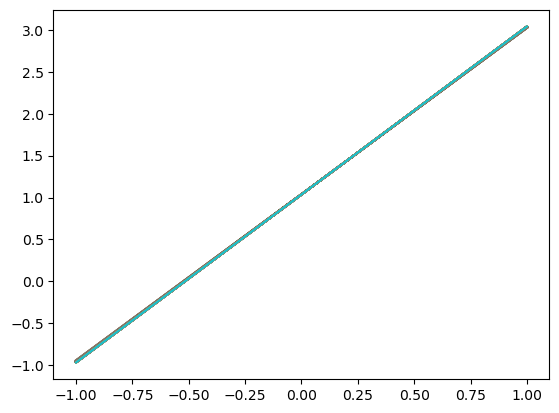

In [16]:
loss_list = []  # 用于保存loss值的列表

for epoch in range(train_epochs):
    loss_ = loss(x_data, y_data, w, b)  # 计算损失
    loss_list.append(loss_)  # 保存本次损失计算结果

    delta_w, delta_b = grad(x_data, y_data, w, b)  # 计算该当前[w,b]点的梯度
    change_w = delta_w * learning_rate  # 计算变量w需要调整的量
    change_b = delta_b * learning_rate  # 计算变量b需要调整的量
    w.assign_sub(change_w)  # 变量w值变更为减去change_w后的值
    b.assign_sub(change_b)  # 变量b值变更为减去change_b后的值

    print("Training Epoch:", "%02d" % (epoch + 1), "loss=%.6f" % (loss_))
    plt.plot(x_data, w.numpy() * x_data + b.numpy())  # 完成一轮训练后，画出回归的线条


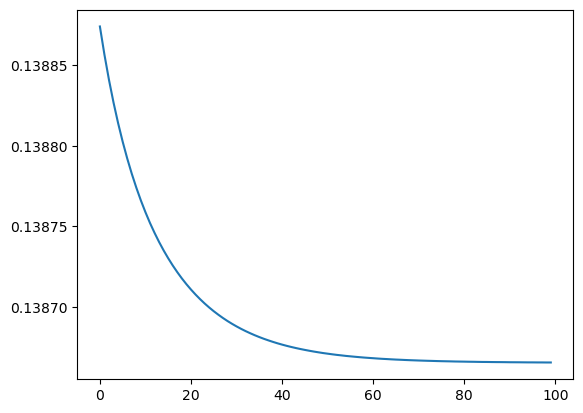

In [17]:
plt.plot(loss_list)
